In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [5]:
train_input = "train.csv"
test_input = "test.csv"

train_dataset = pd.read_csv(train_input)
test_dataset = pd.read_csv(test_input)

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [10]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


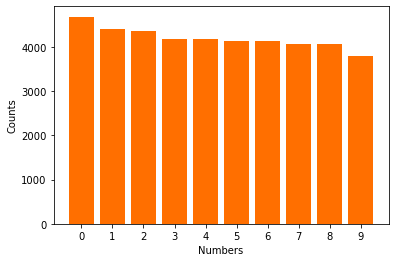

In [11]:
plt.bar(range(10), train_dataset.label.value_counts(), color="#FF6F00", tick_label=range(10))
plt.xlabel("Numbers")
plt.ylabel("Counts")
plt.show()

In [12]:
train_labels = tf.keras.utils.to_categorical(train_dataset.pop("label"))

-1 for input x specifies that this dimension should be dynamically computed based on the number of input values in x, holding the size of all other dimensions constant.

The last 1 indidates that the image is in grayscale.

In [13]:
train_dataset = np.array(train_dataset.values.reshape(-1, 28, 28, 1))
test_dataset = np.array(test_dataset.values.reshape(-1, 28, 28, 1))

In RGB, The pixel values can range from 0 to 256. Each number represents a color code.
When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this we can normalize the values to range from 0 to 1.
In this way, the numbers will be small and the computation becomes easier and faster.

In [14]:
train_dataset = train_dataset/255.0
test_dataset = test_dataset/255.0
#pixel-255

In [14]:
checkpoint_path = "logs/checkpoints/"

Relu - If X>0 return X, else return 0;  it only passes values 0 or greater to the next layer in the network.

Dense layer- Adds a layer of neurons
Each layer of neurons need an activation function to tell them what to do

Dropout- used to remove additional noises(irrevelant intermediate results) to decreasing processing time.

IN CNN, we filter the images before training the deep neural network

In normalation we scale down the values,ie, now we dont have wide range between data points.
it happens before feeding the data the network

Batch norm - sets a new std. dev and mean for the data, bu multiplying an arbitrary parameter and adding an arbit. param
they reduce the ability of outliers large wghts to influence training.
Normalise data from actv fn
 
 Acitvation fn- transforms the result to no btw 0 and 1(sigmoid)
 
Dropout- this layer isused to reuce the no of features(nodes) hence reducing overfitting

Optimizers -algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation=tf.nn.relu, padding="SAME"),#(n-f+1)->26*26 size
    tf.keras.layers.MaxPooling2D(),#max value of a filter by striding
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),#not change  img size
    #relu filter the output if the fun returns 0 or less
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),#to normalise the output from activation fn
    tf.keras.layers.Flatten(), #image pixel array
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),#to prevent overfitting , used in training dataset
    tf.keras.layers.Dense(10, activation="softmax") #softmax picks the biggest number in the set(probability)
])
model.summary()
epochs=10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)#callbacks-best weight save
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_dataset, train_labels, epochs=epochs, callbacks=callbacks, batch_size=64)
#batch size 64 means 64 images wil be passed at a time or as a batch
#larger the batch size quicker each epoch will be completed but if increased very large, may degrade the performance ofthe model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

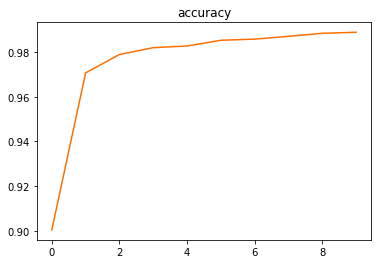

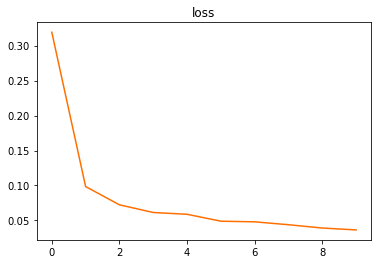

In [17]:
def plot_metric(metric):
    plt.plot(range(epochs), history.history[metric], color="#FF6F00")
    plt.title(metric)
    plt.show()  
plot_metric("accuracy")
plot_metric("loss")

In [18]:
model.load_weights(checkpoint_path)

In [19]:
labels = [np.argmax(predict) for predict in model.predict(test_dataset)]
df = pd.DataFrame({
    "ImageId": list(range(1, len(test_dataset)+1)),
    "Label": labels,
})

In [20]:
model.save("model.h5")

In [2]:
import tkinter as tk
from tkinter import *
import win32gui
import numpy as np
from PIL import ImageGrab,Image
import tkinter.messagebox
import tensorflow as tf

def clear():
    canvas.delete("all")

def predict():
    x0 = canvas.winfo_rootx() + 8
    y0 = canvas.winfo_rooty() + 3
    x1 = x0 + 425
    y1 = y0 + 470

    img = ImageGrab.grab((x0, y0, x1, y1))
   
    img = img.resize((28, 28)).convert("L")
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))
    img = img / 255.0
    value = np.argmax(model.predict(img))
    tkinter.messagebox.showinfo("Prediction", "it's a " + str(value))

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y
    #to find prev coordinate of drawn point

def draw(event):
    global lasx, lasy
    canvas.create_oval((lasx, lasy, event.x, event.y), 
                      fill='white', outline='white', 
                      width=15)
    lasx, lasy = event.x, event.y



model = tf.keras.models.load_model("model.h5")
window = Tk()
window.geometry("350x400+1+1")
window.title("Digit Recognization.")

canvas = Canvas(window, bg='black',height="370",width="340")
canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw)

button_frame = tk.Frame(window)
clear_button = tk.Button(button_frame, text="Clearscreen", command=clear)
predict_button = tk.Button(button_frame, text="Predict the number", command=predict)

canvas.pack(expand= FALSE)#the canvas size remains same even after expanding the window
clear_button.pack(side="left")
predict_button.pack(side="right")
button_frame.pack(side = "bottom")

window.mainloop()